In [1]:
import anndata as ad
import pandas as pd
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
%load_ext autoreload

%autoreload 2
from spatial_compare import  SpatialCompare, spatial_detection_scores

#Reading samples in h5ad format
These samples are from the same tissue block, serially sectioned and ran in Xenium and Cosmx.
Prostate cancer - Xenium (n = 375)
Prostate cancer - CosMx (n = 1000)

In [46]:
pr1 = ad.read_h5ad("/mnt/scratch2/SpaceHack/TOUCHSTONE_STJ_XR_FFPE_PR_1_UOA_C_R1.h5ad")
pr2 = ad.read_h5ad("/mnt/scratch2/SpaceHack/TOUCHSTONE_STJ_CR_FFPE_PR_1_UOA_C_R1.h5ad")

In [51]:
## Initialize object 
sc = SpatialCompare(pr1, pr2, data_names=["Prostate Cancer Xenium", "Prostate Cancer CosMx"], category='celltype_pred', obsm_key='test')

input anndata objects have 125 shared genes


dict_keys(['Smooth muscle', 'Epithelial (Luminal)', 'Fibroblast', 'Endothelial', 'Pericyte', 'Epithelial (Basal)', 'Macrophage', 'Muscle (CHRNG+)', 'Epithelial (Club)', 'Epithelial (DPYS+)', 'T/NK cell', 'Mast cell'])


True

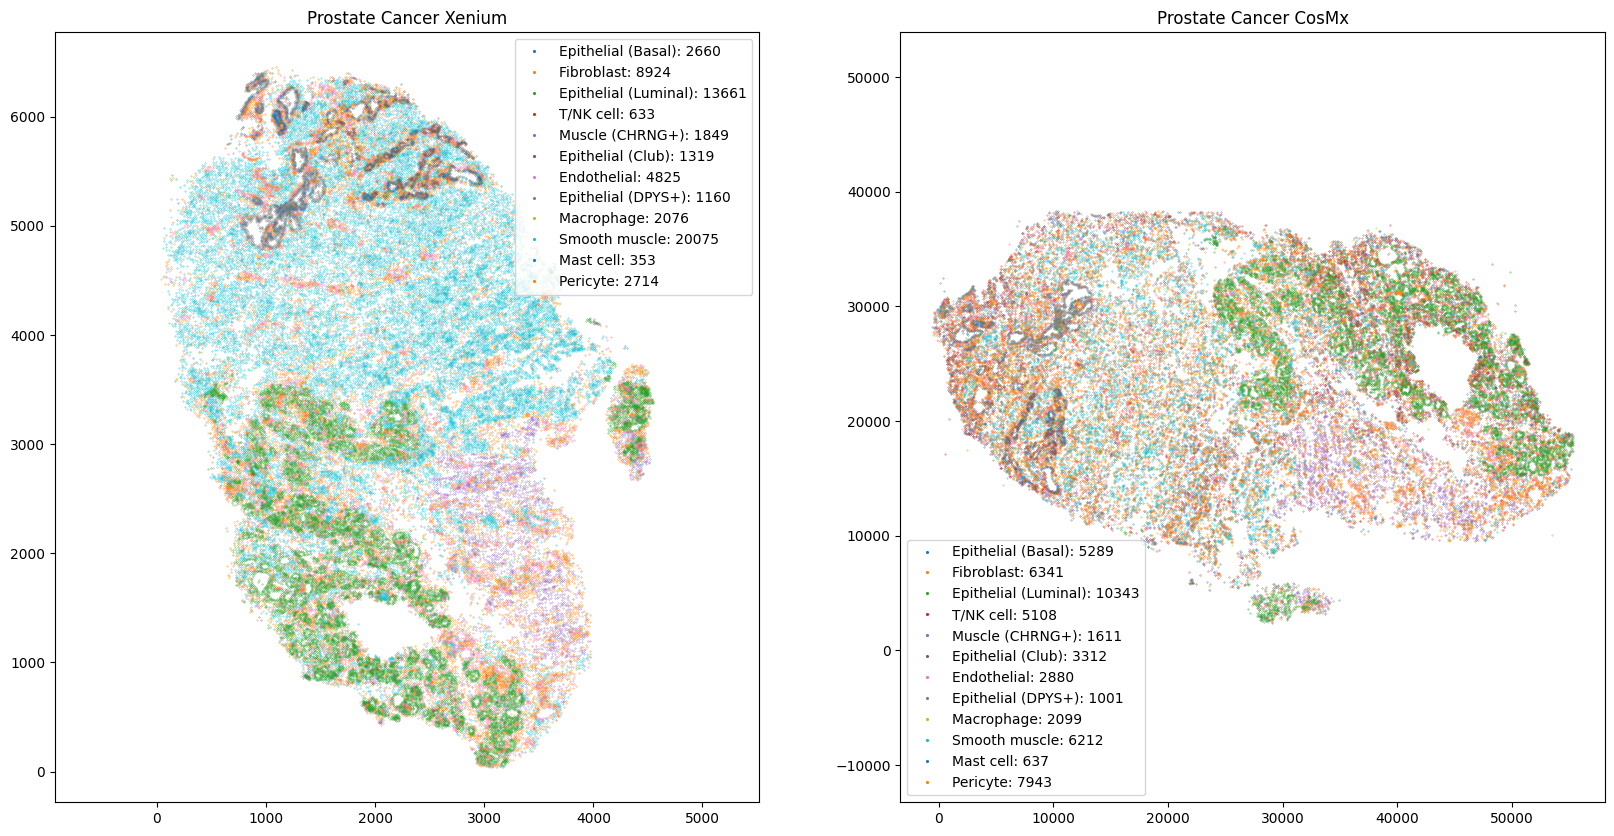

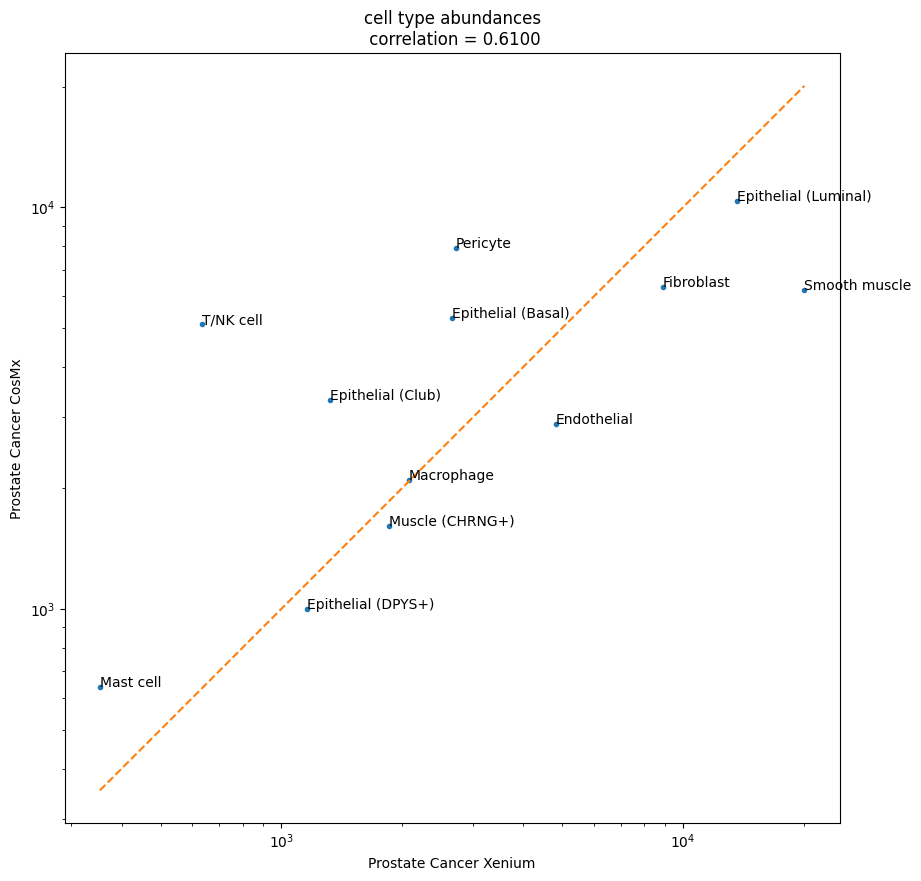

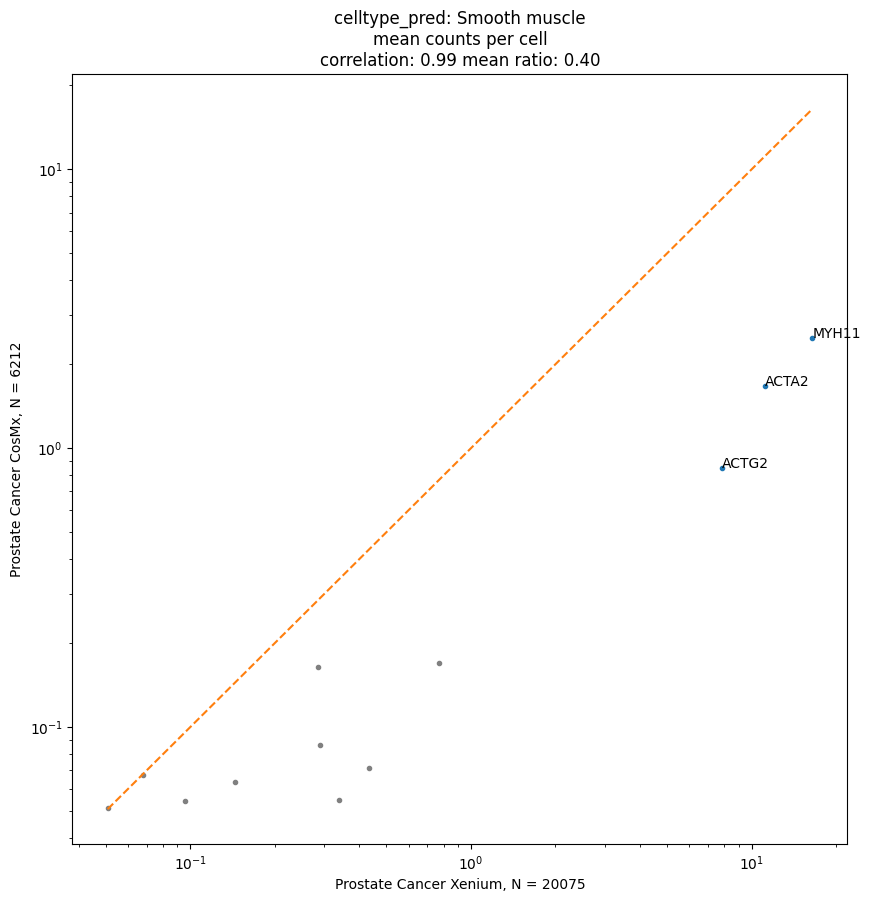

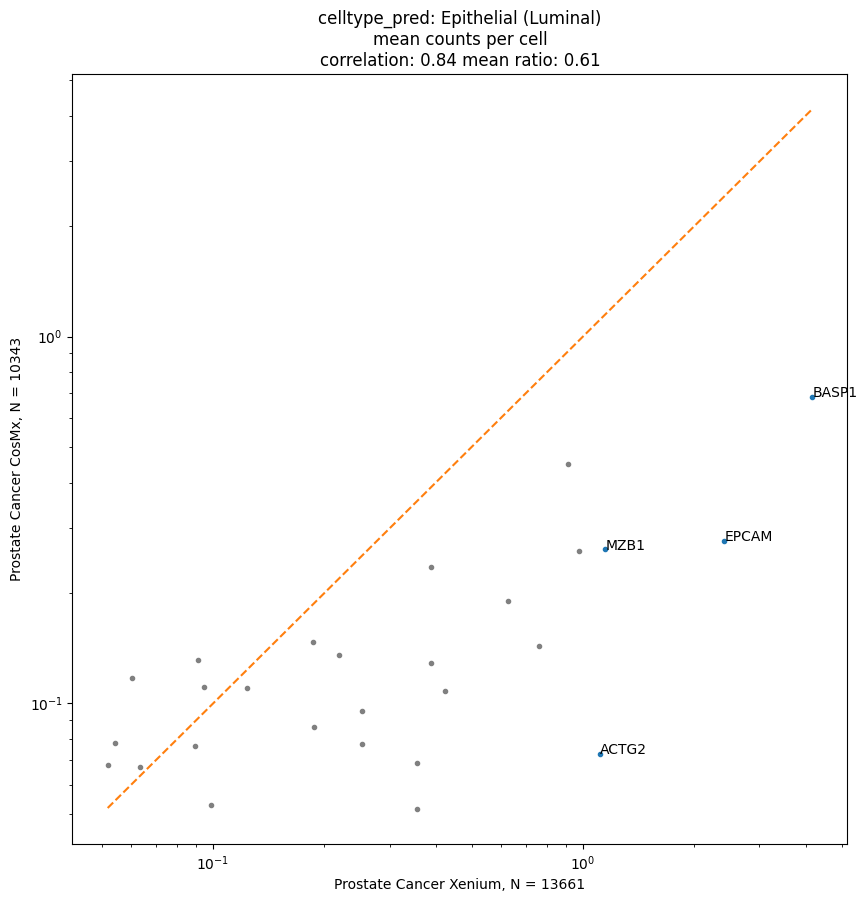

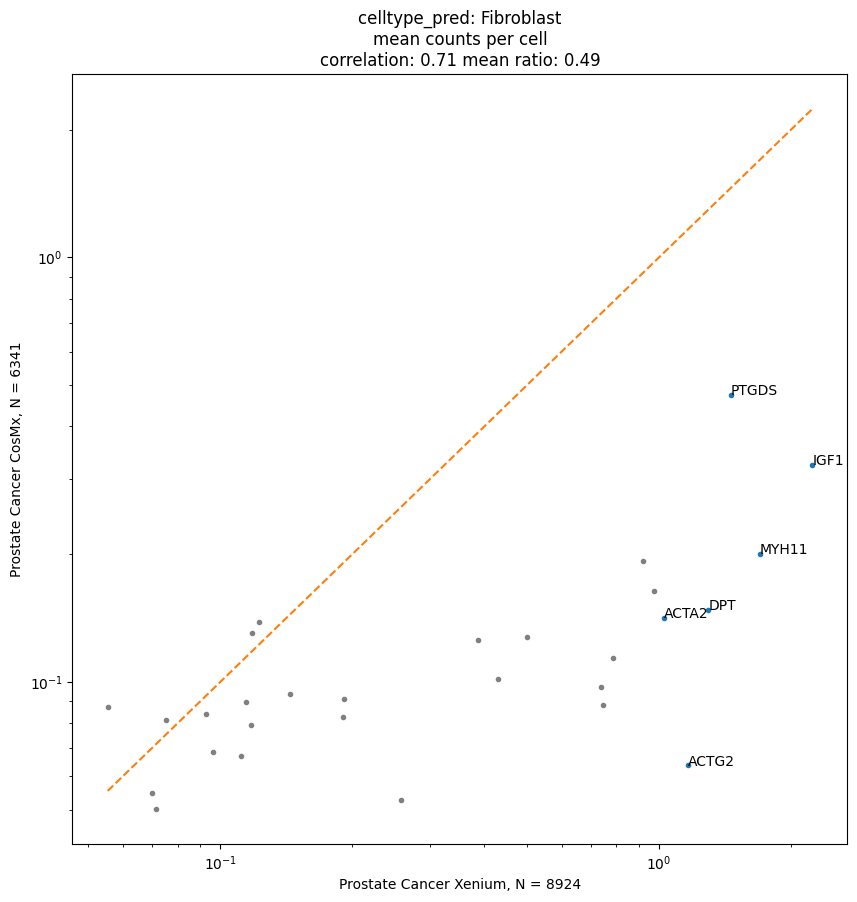

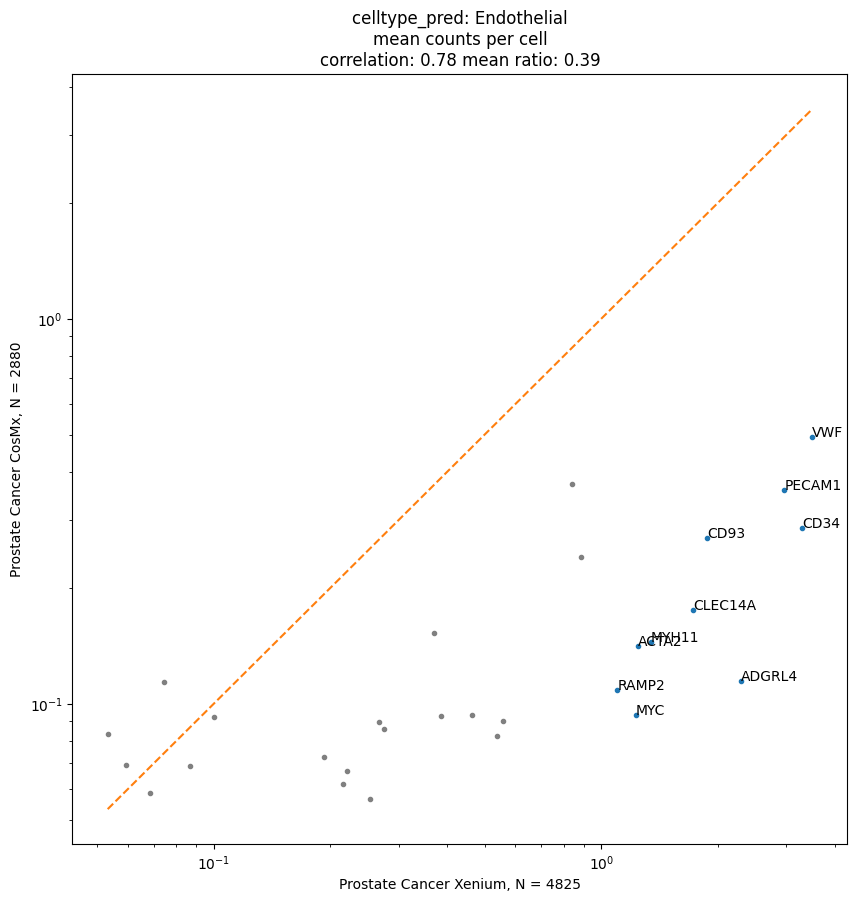

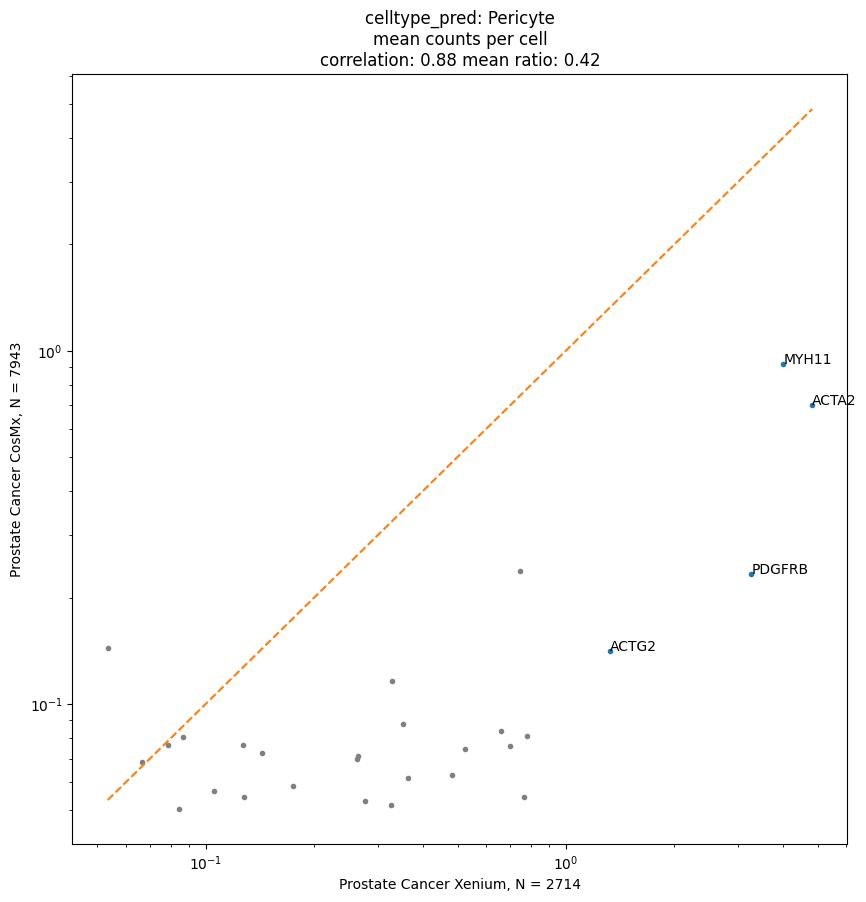

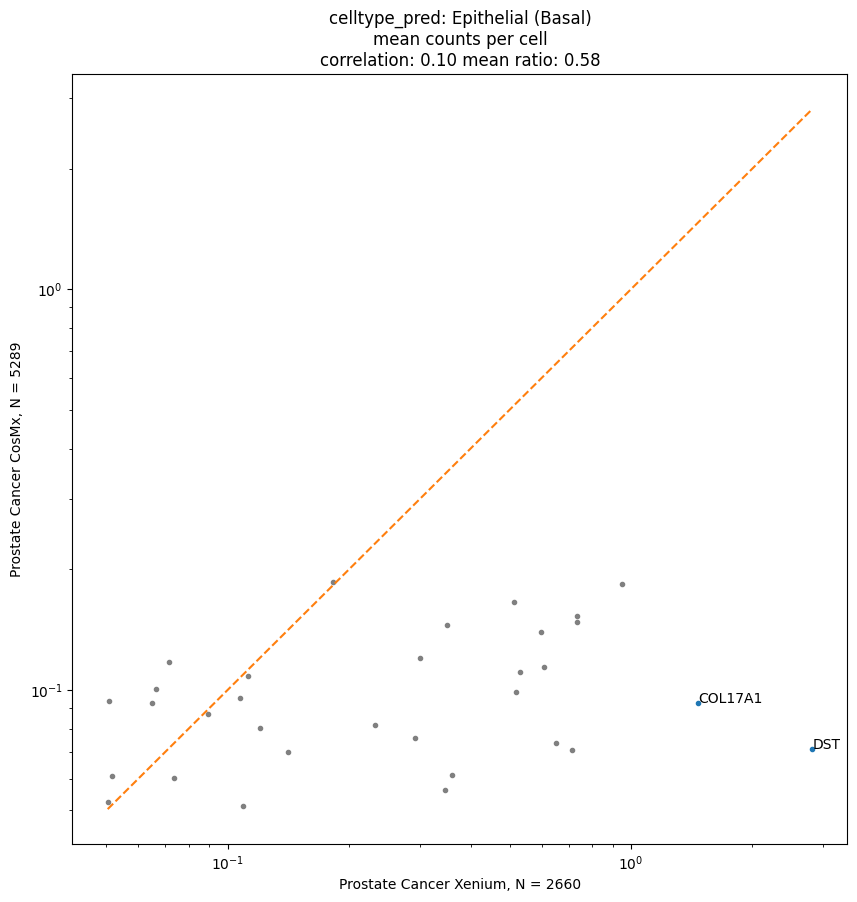

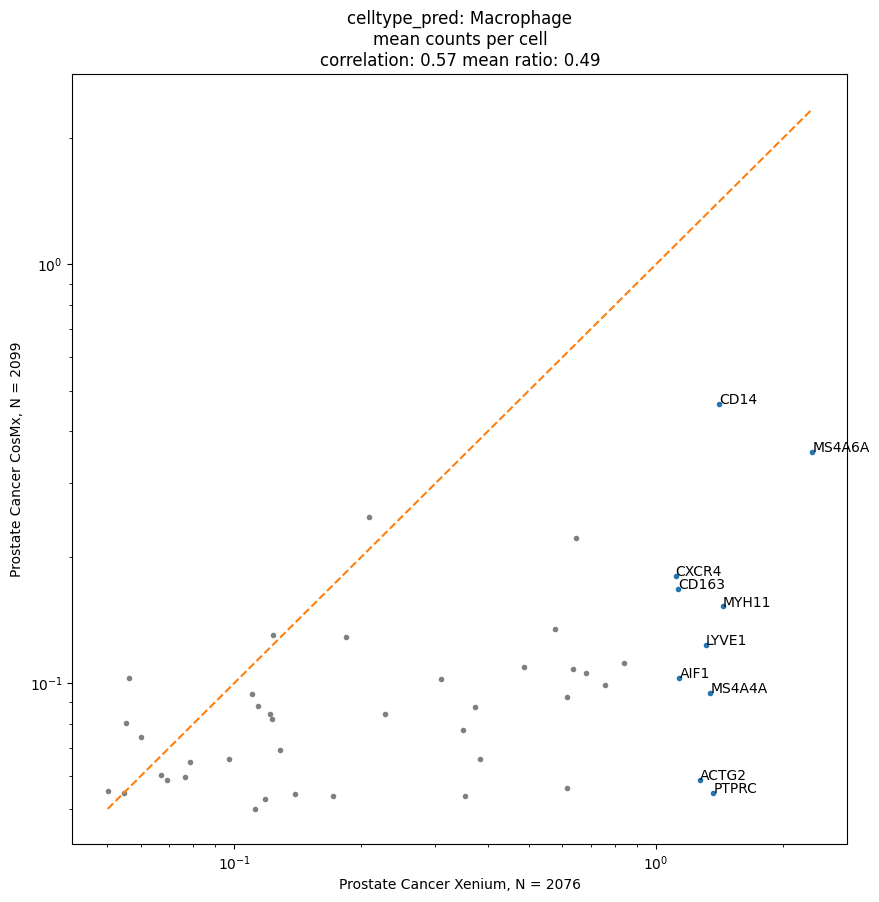

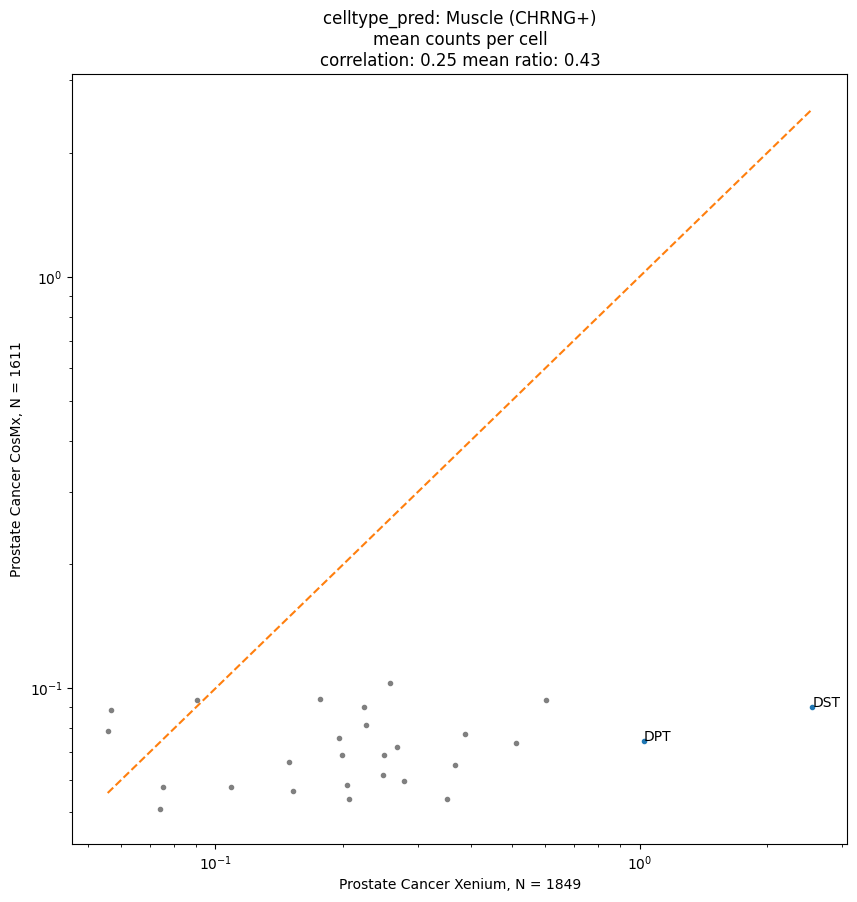

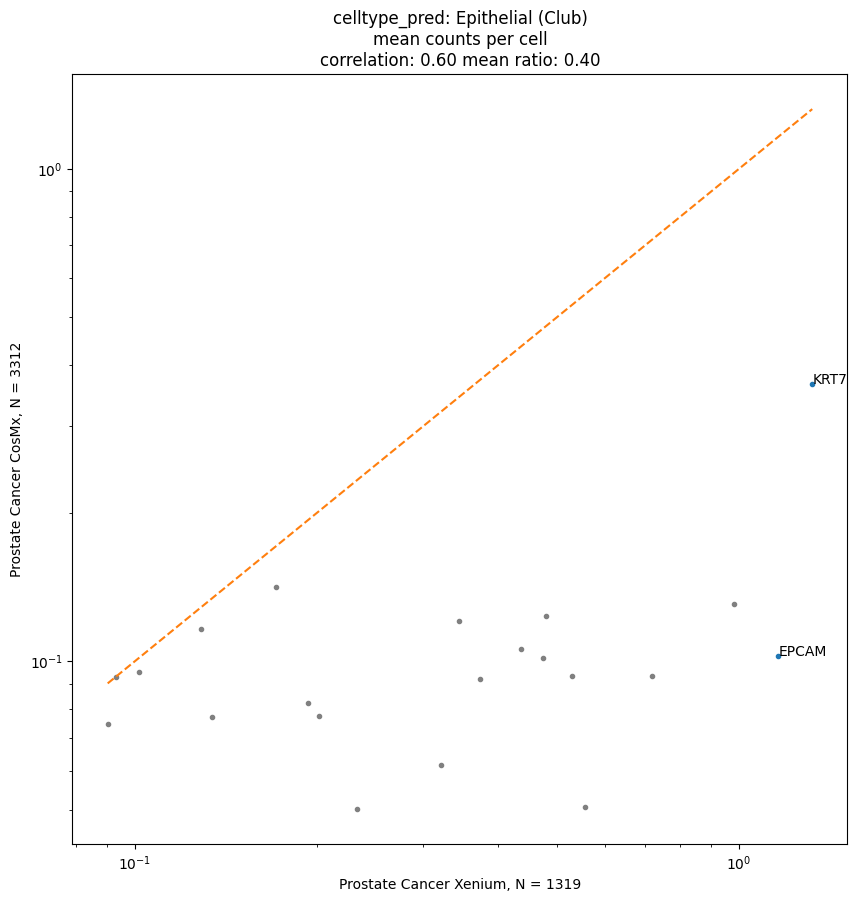

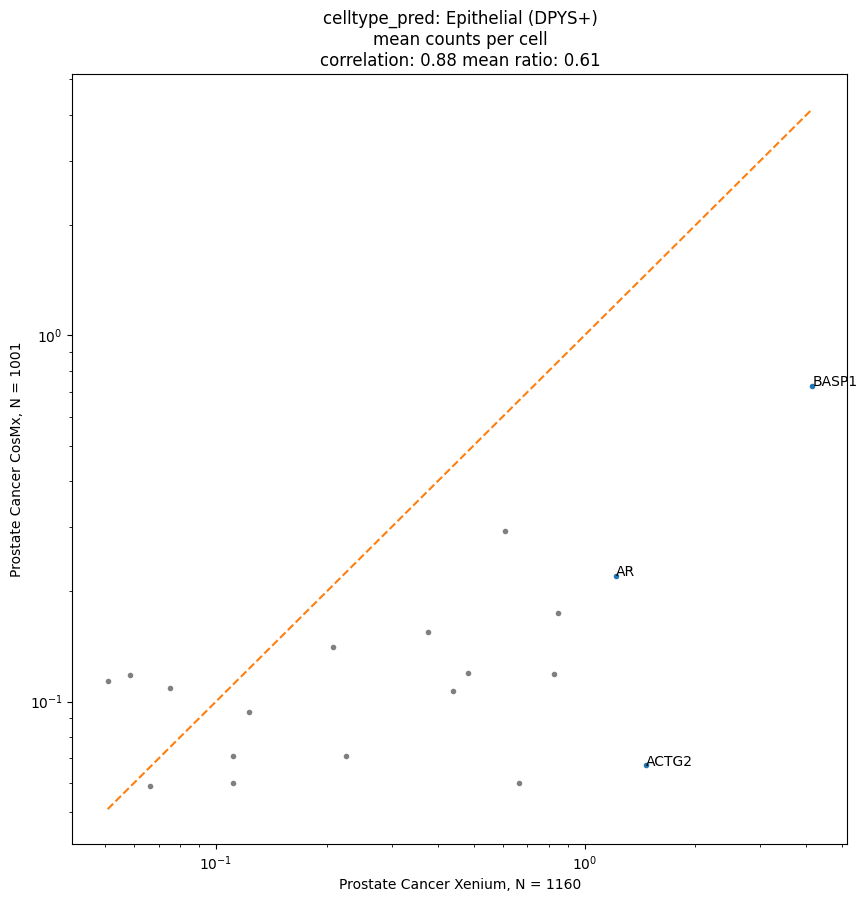

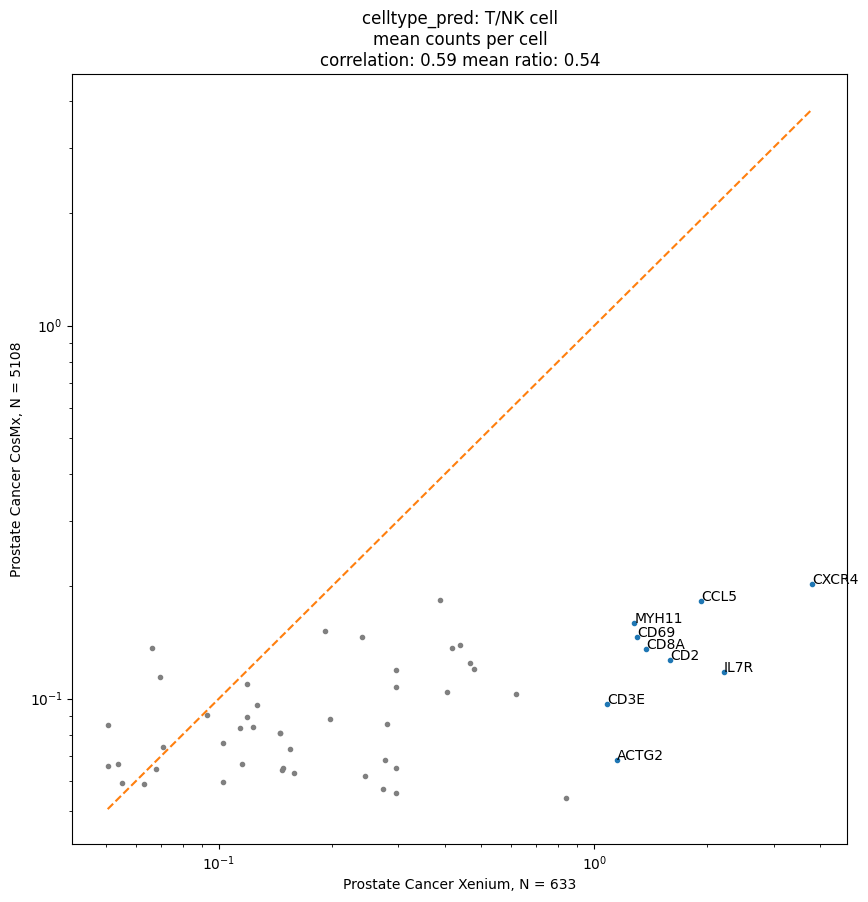

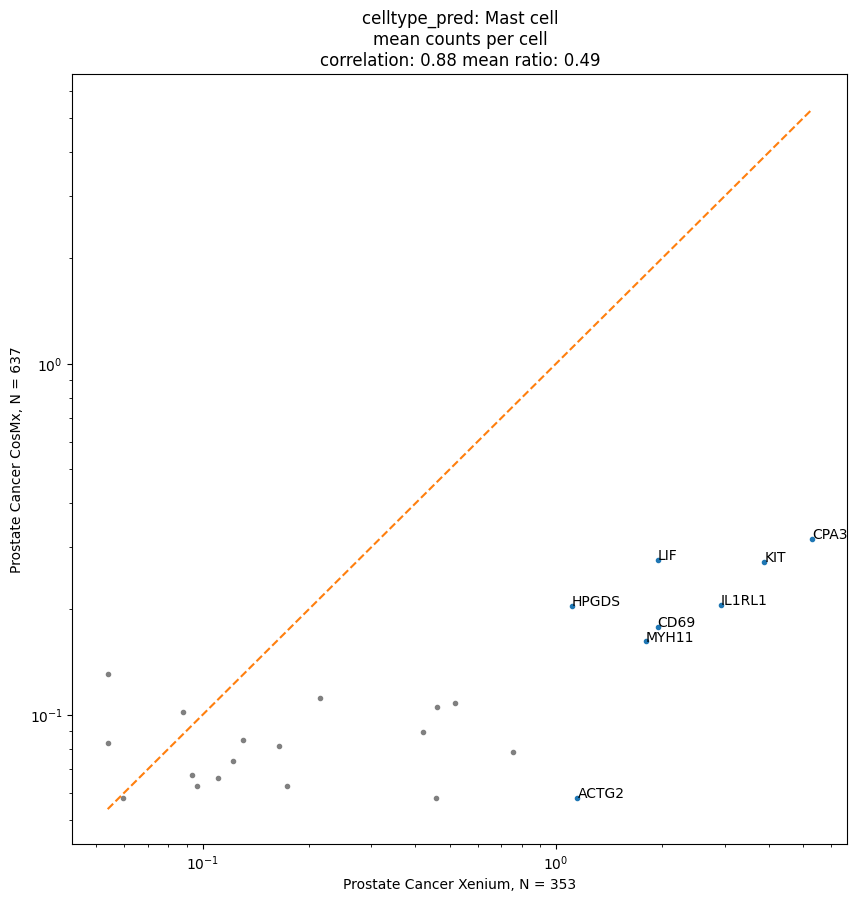

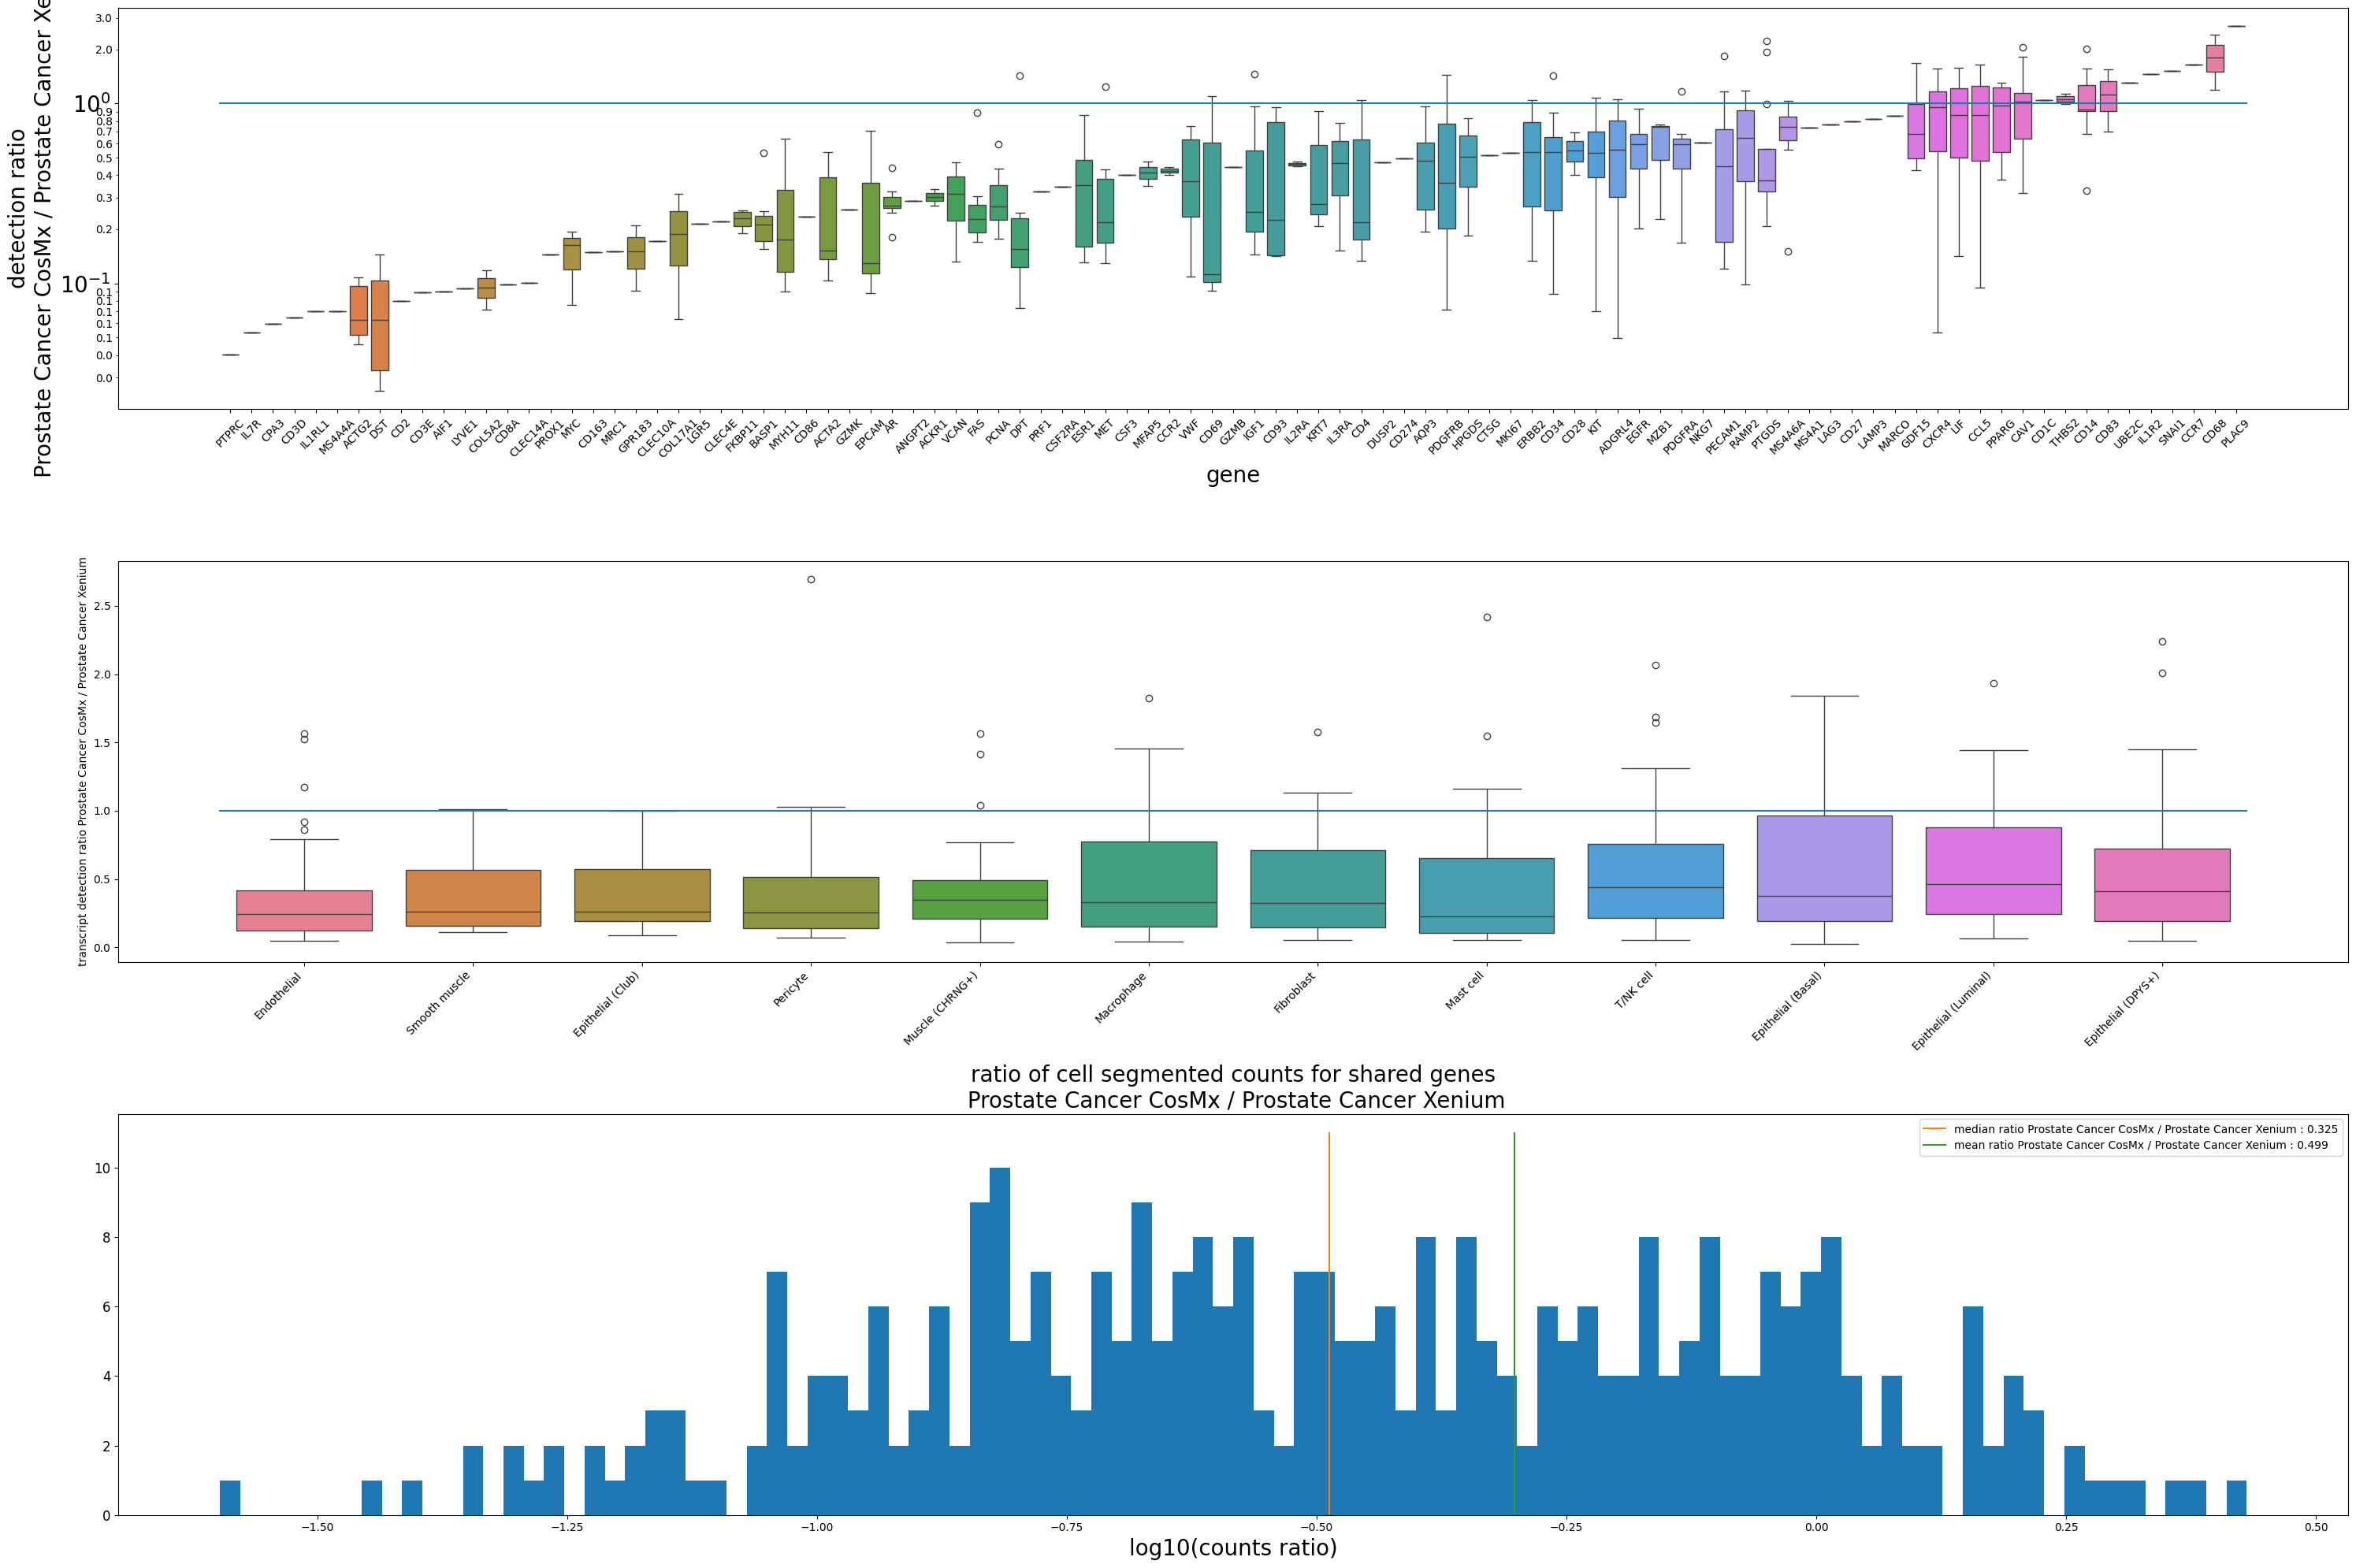

In [54]:
# Run metrics and plotting
sc.run_and_plot(min_mean_expression = 0.05)

In [47]:
pr1.obsm["spatial_cirro_grid"] = pr1.obsm["TISSUE"][['Tissue_1', 'Tissue_2']].to_numpy()
pr2.obsm["spatial_cirro_grid"] = pr2.obsm["TISSUE"][['Tissue_1', 'Tissue_2']].to_numpy()


In [57]:
# Add needed info to run spatial detection score
pr1.obs['x_centroid'] = pr1.obsm['TISSUE']['Tissue_1']
pr1.obs['y_centroid'] = pr1.obsm['TISSUE']['Tissue_2']

pr2.obs['x_centroid'] = pr2.obsm['TISSUE']['Tissue_1']
pr2.obs['y_centroid'] = pr2.obsm['TISSUE']['Tissue_2']


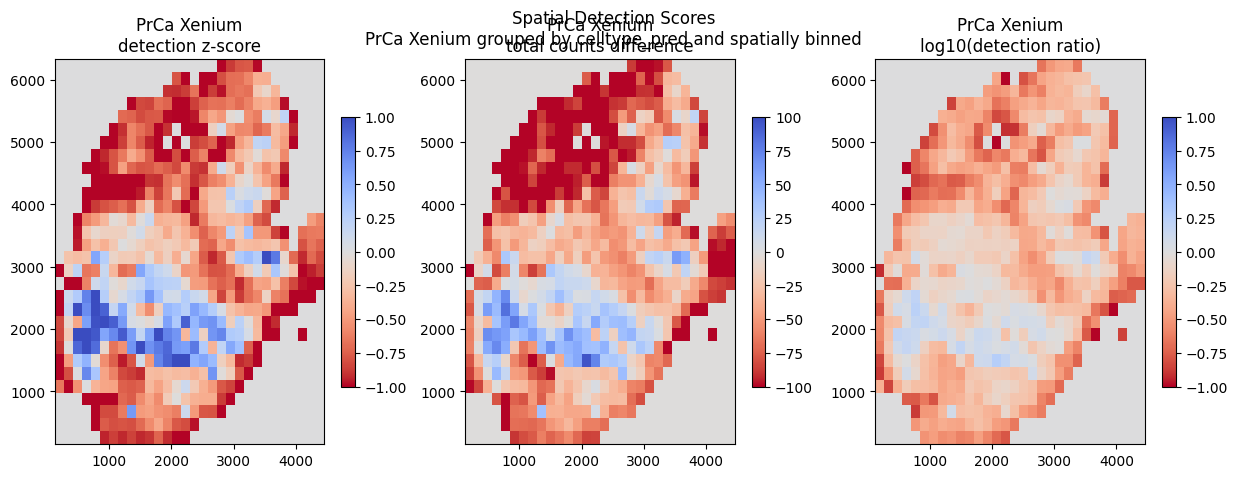

In [ ]:
s = spatial_detection_scores(pr2.obs,pr1.obs, query_name="PrCa Xenium", n_bins=30,non_spatial=False, category='celltype_pred')



Breast cancer samples
Breast cancer - Xenium (n = 375)
Breast cancer - CosMx (n = 1000)

In [59]:
br1 = ad.read_h5ad('/mnt/scratch2/SpaceHack/TOUCHSTONE_UOA_CR_FFPE_BR_1_SYD_C_R1.h5ad')
br2 = ad.read('/mnt/scratch2/SpaceHack/TOUCHSTONE_UOA_XR_FFPE_BR_1_SYD_C_R1.h5ad')

/mnt/scratch1/miniconda3/envs/SpaceHack_MM/lib/python3.11/site-packages/anndata/__init__.py:55: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


CPU times: user 6 μs, sys: 3 μs, total: 9 μs
Wall time: 18.1 μs
input anndata objects have 120 shared genes
dict_keys(['CAFs', 'Cancer Epithelial', 'Myeloid', 'T-cells', 'Endothelial', 'Normal Epithelial', 'PVL', 'Plasmablasts', 'B-cells'])


True

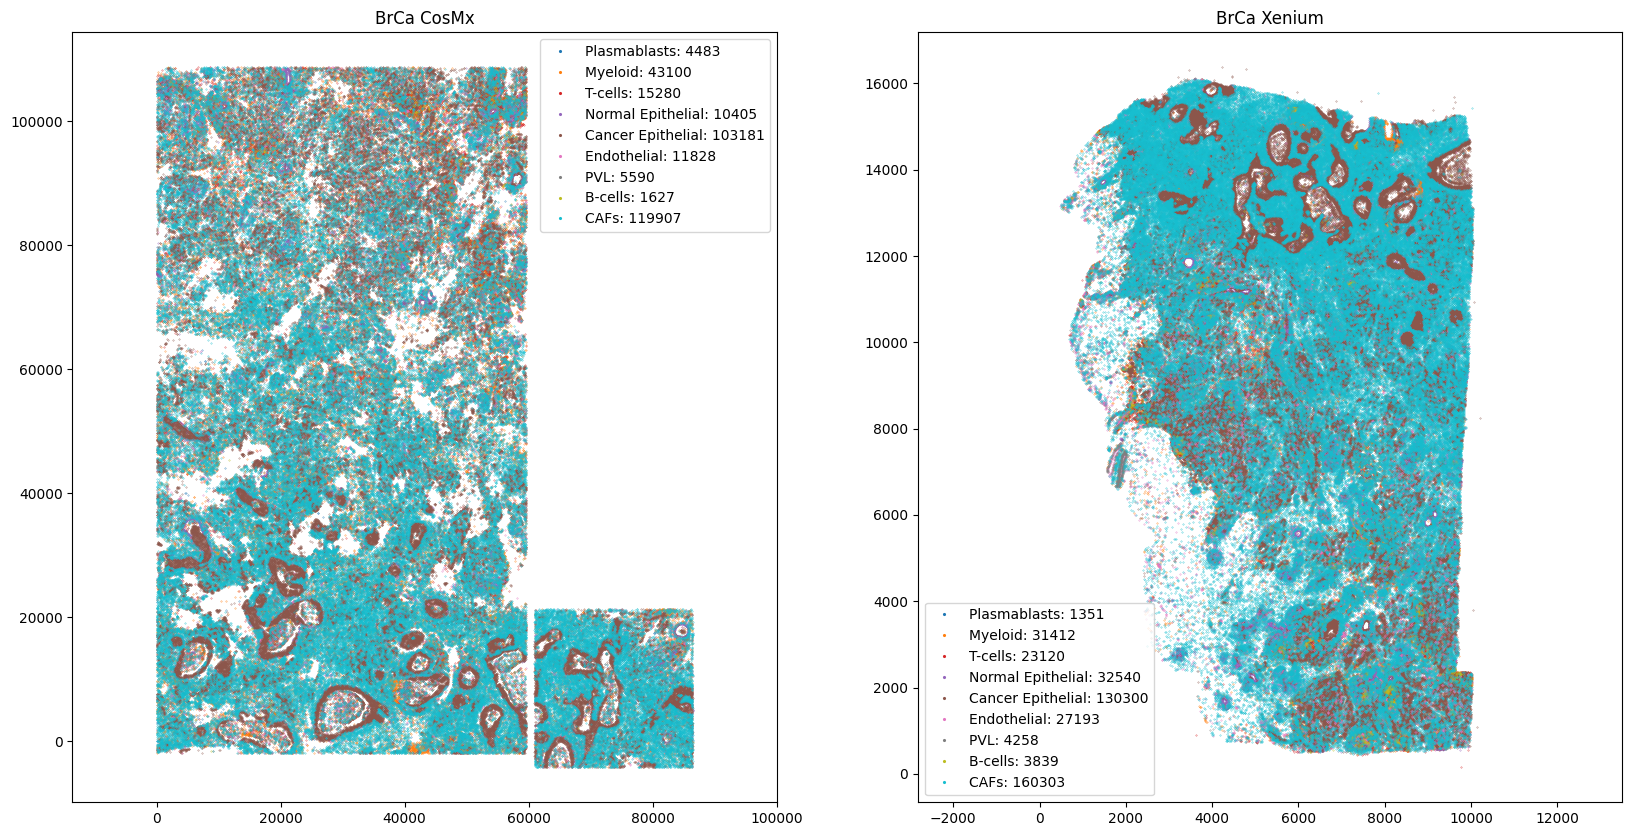

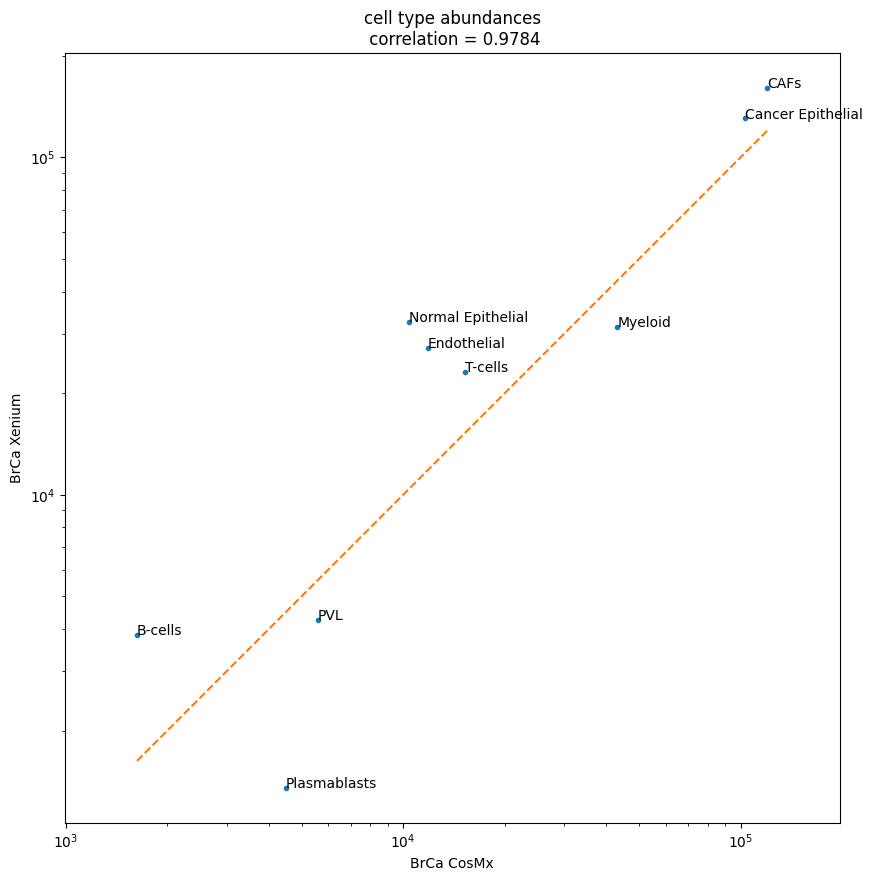

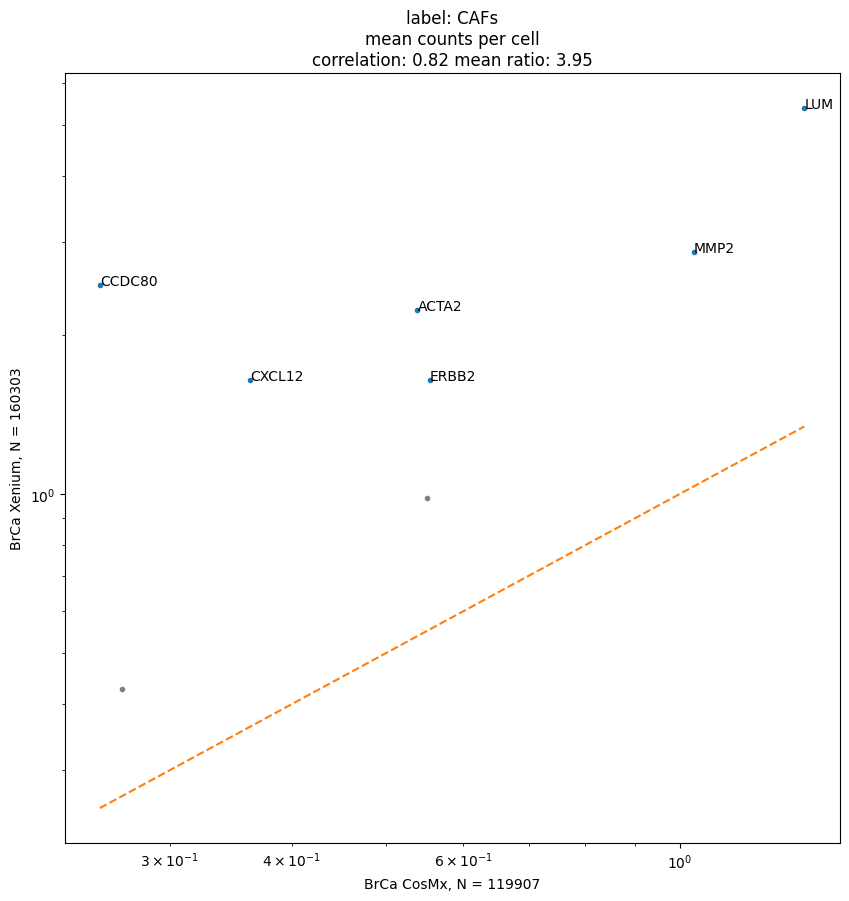

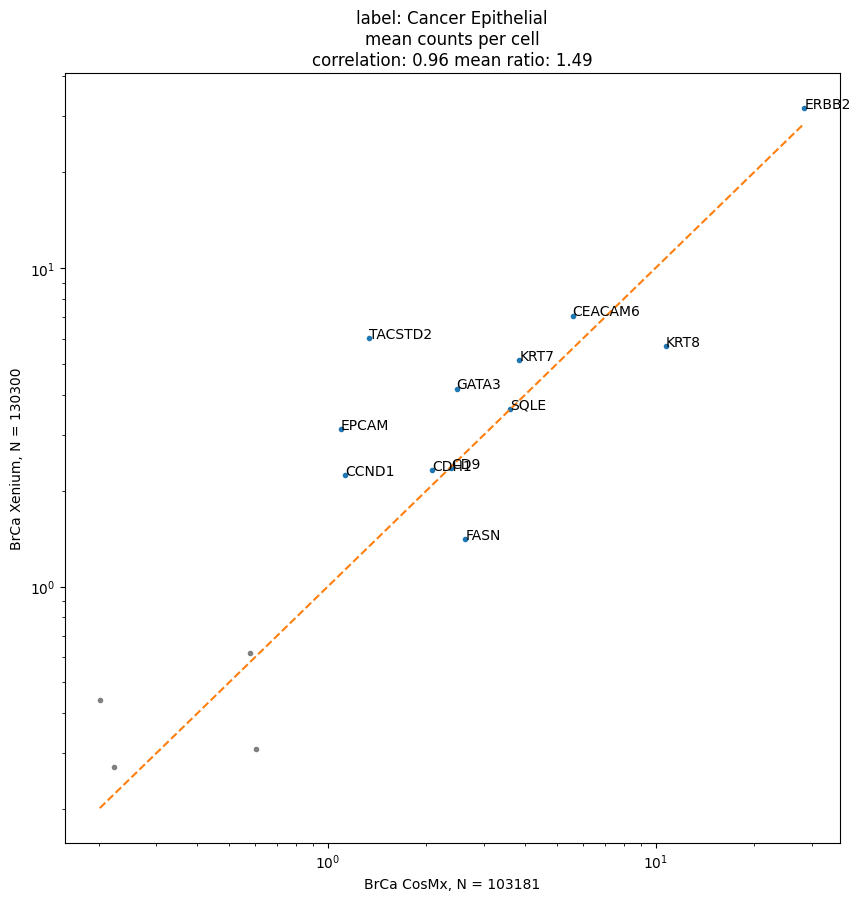

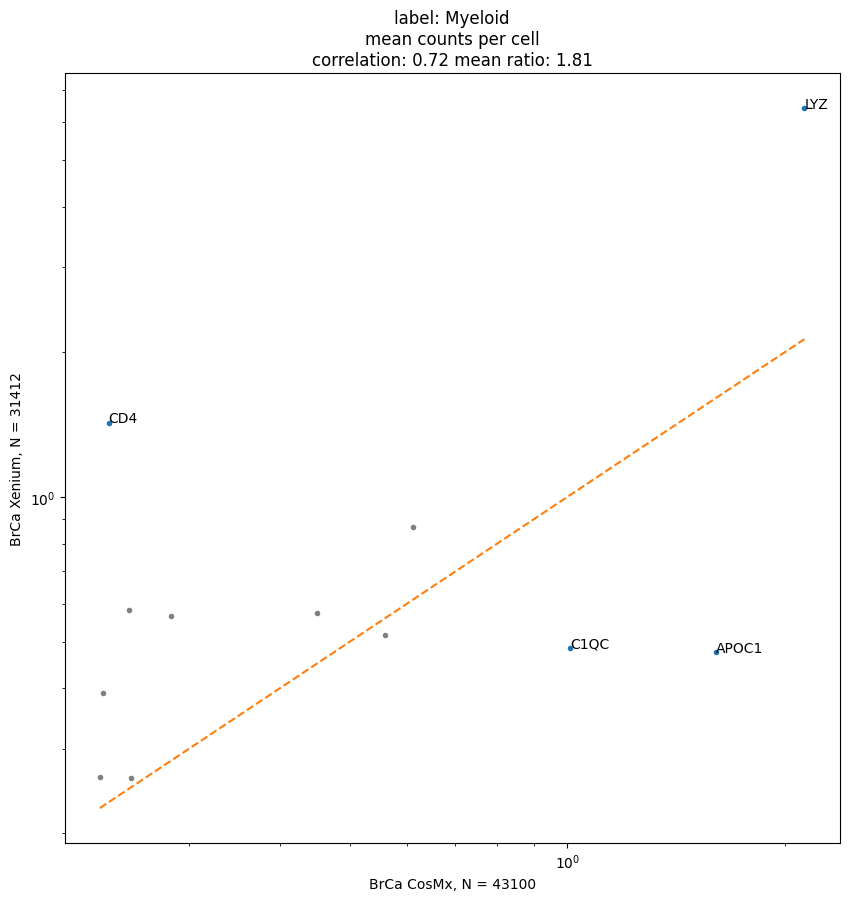

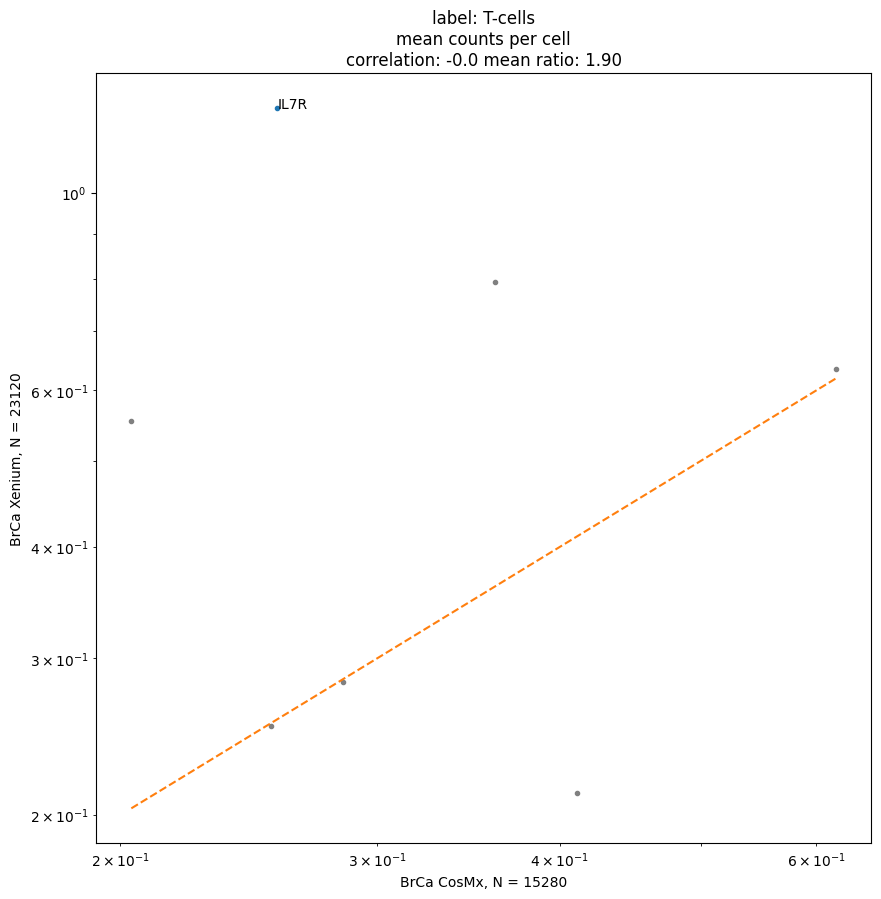

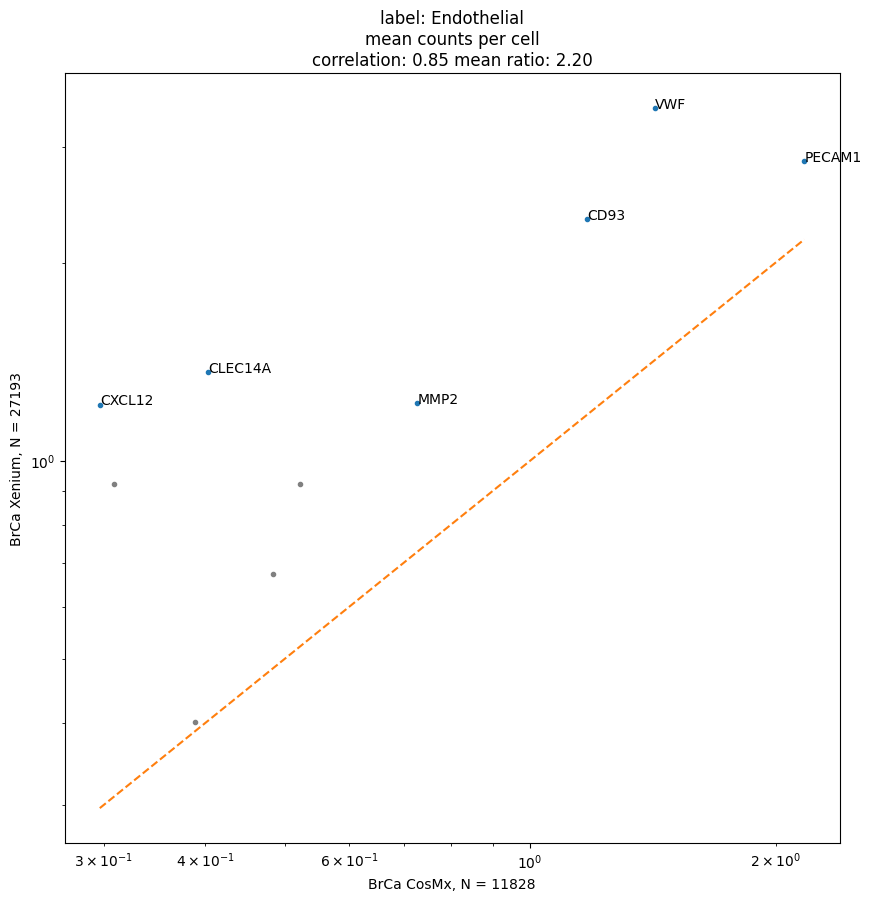

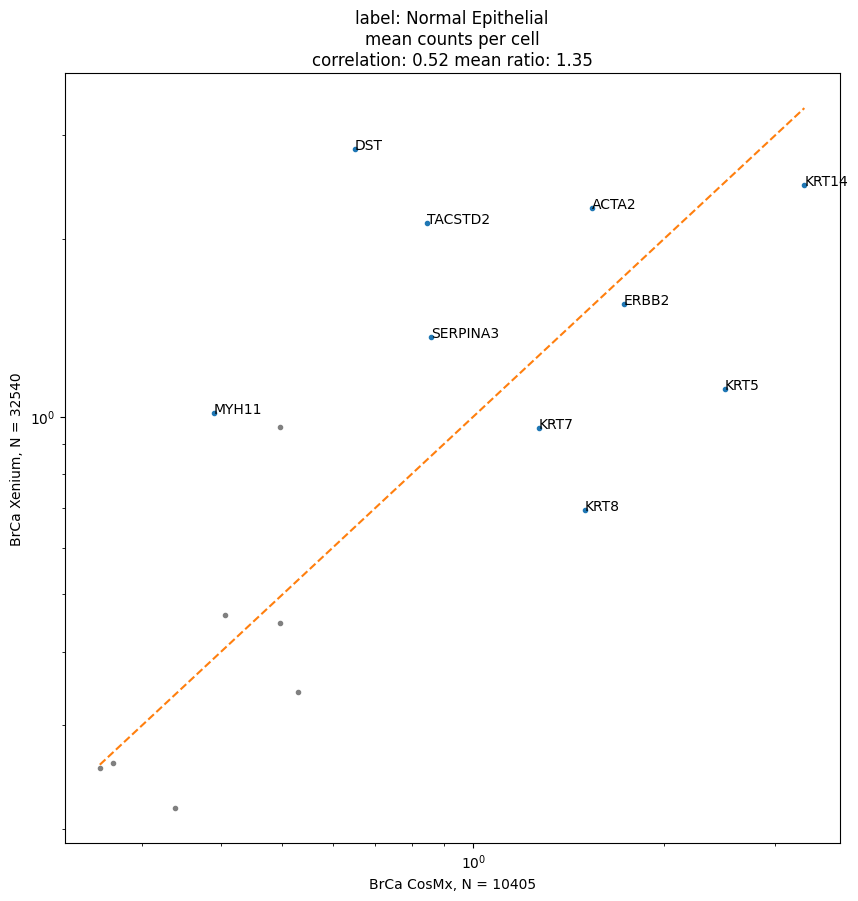

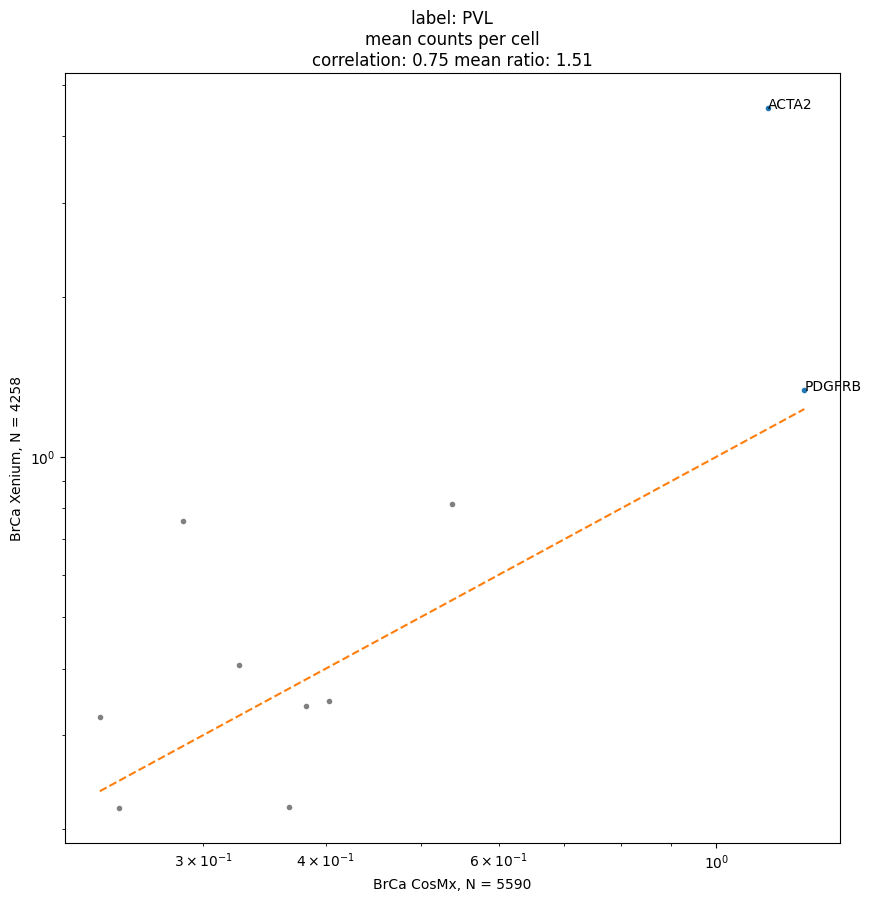

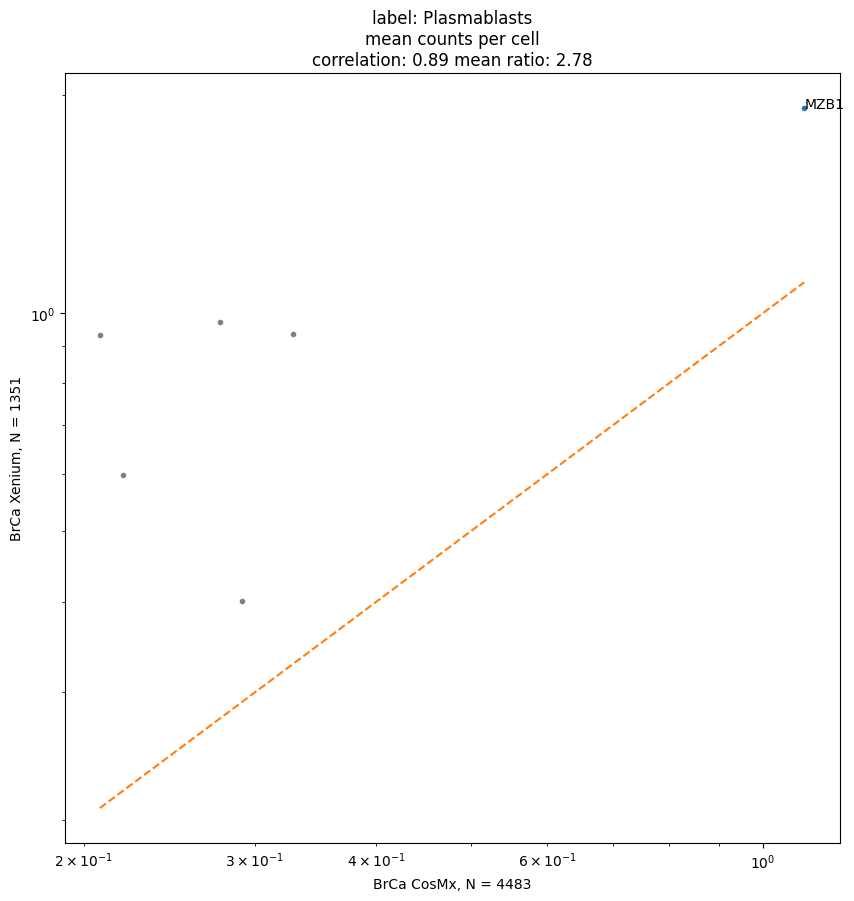

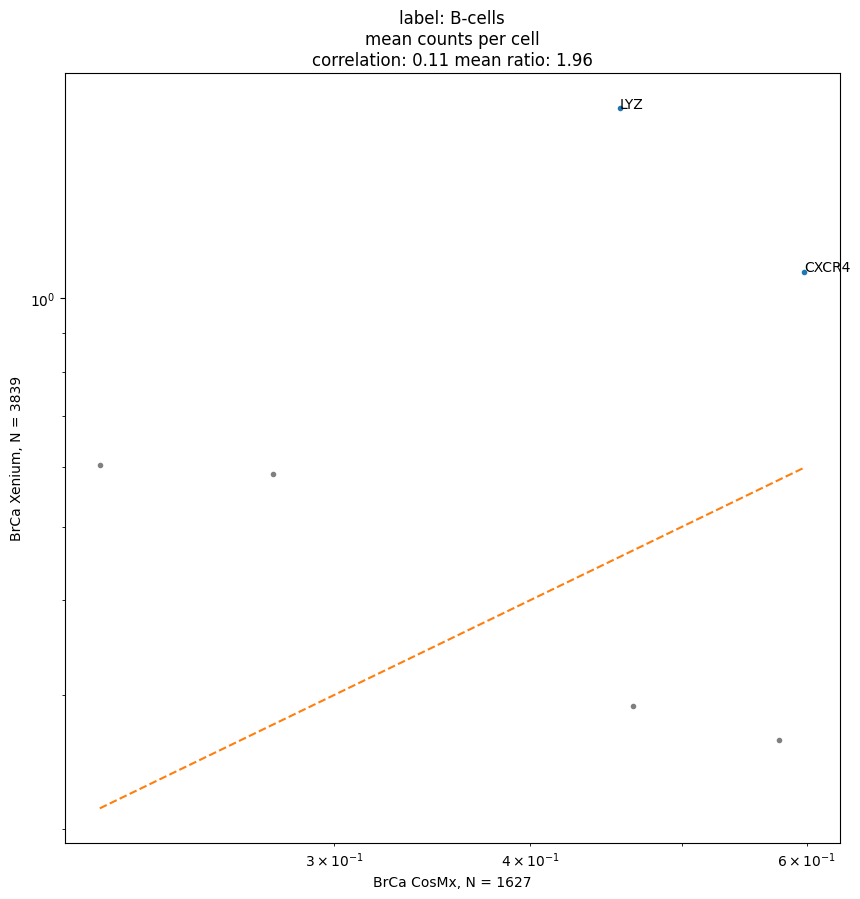

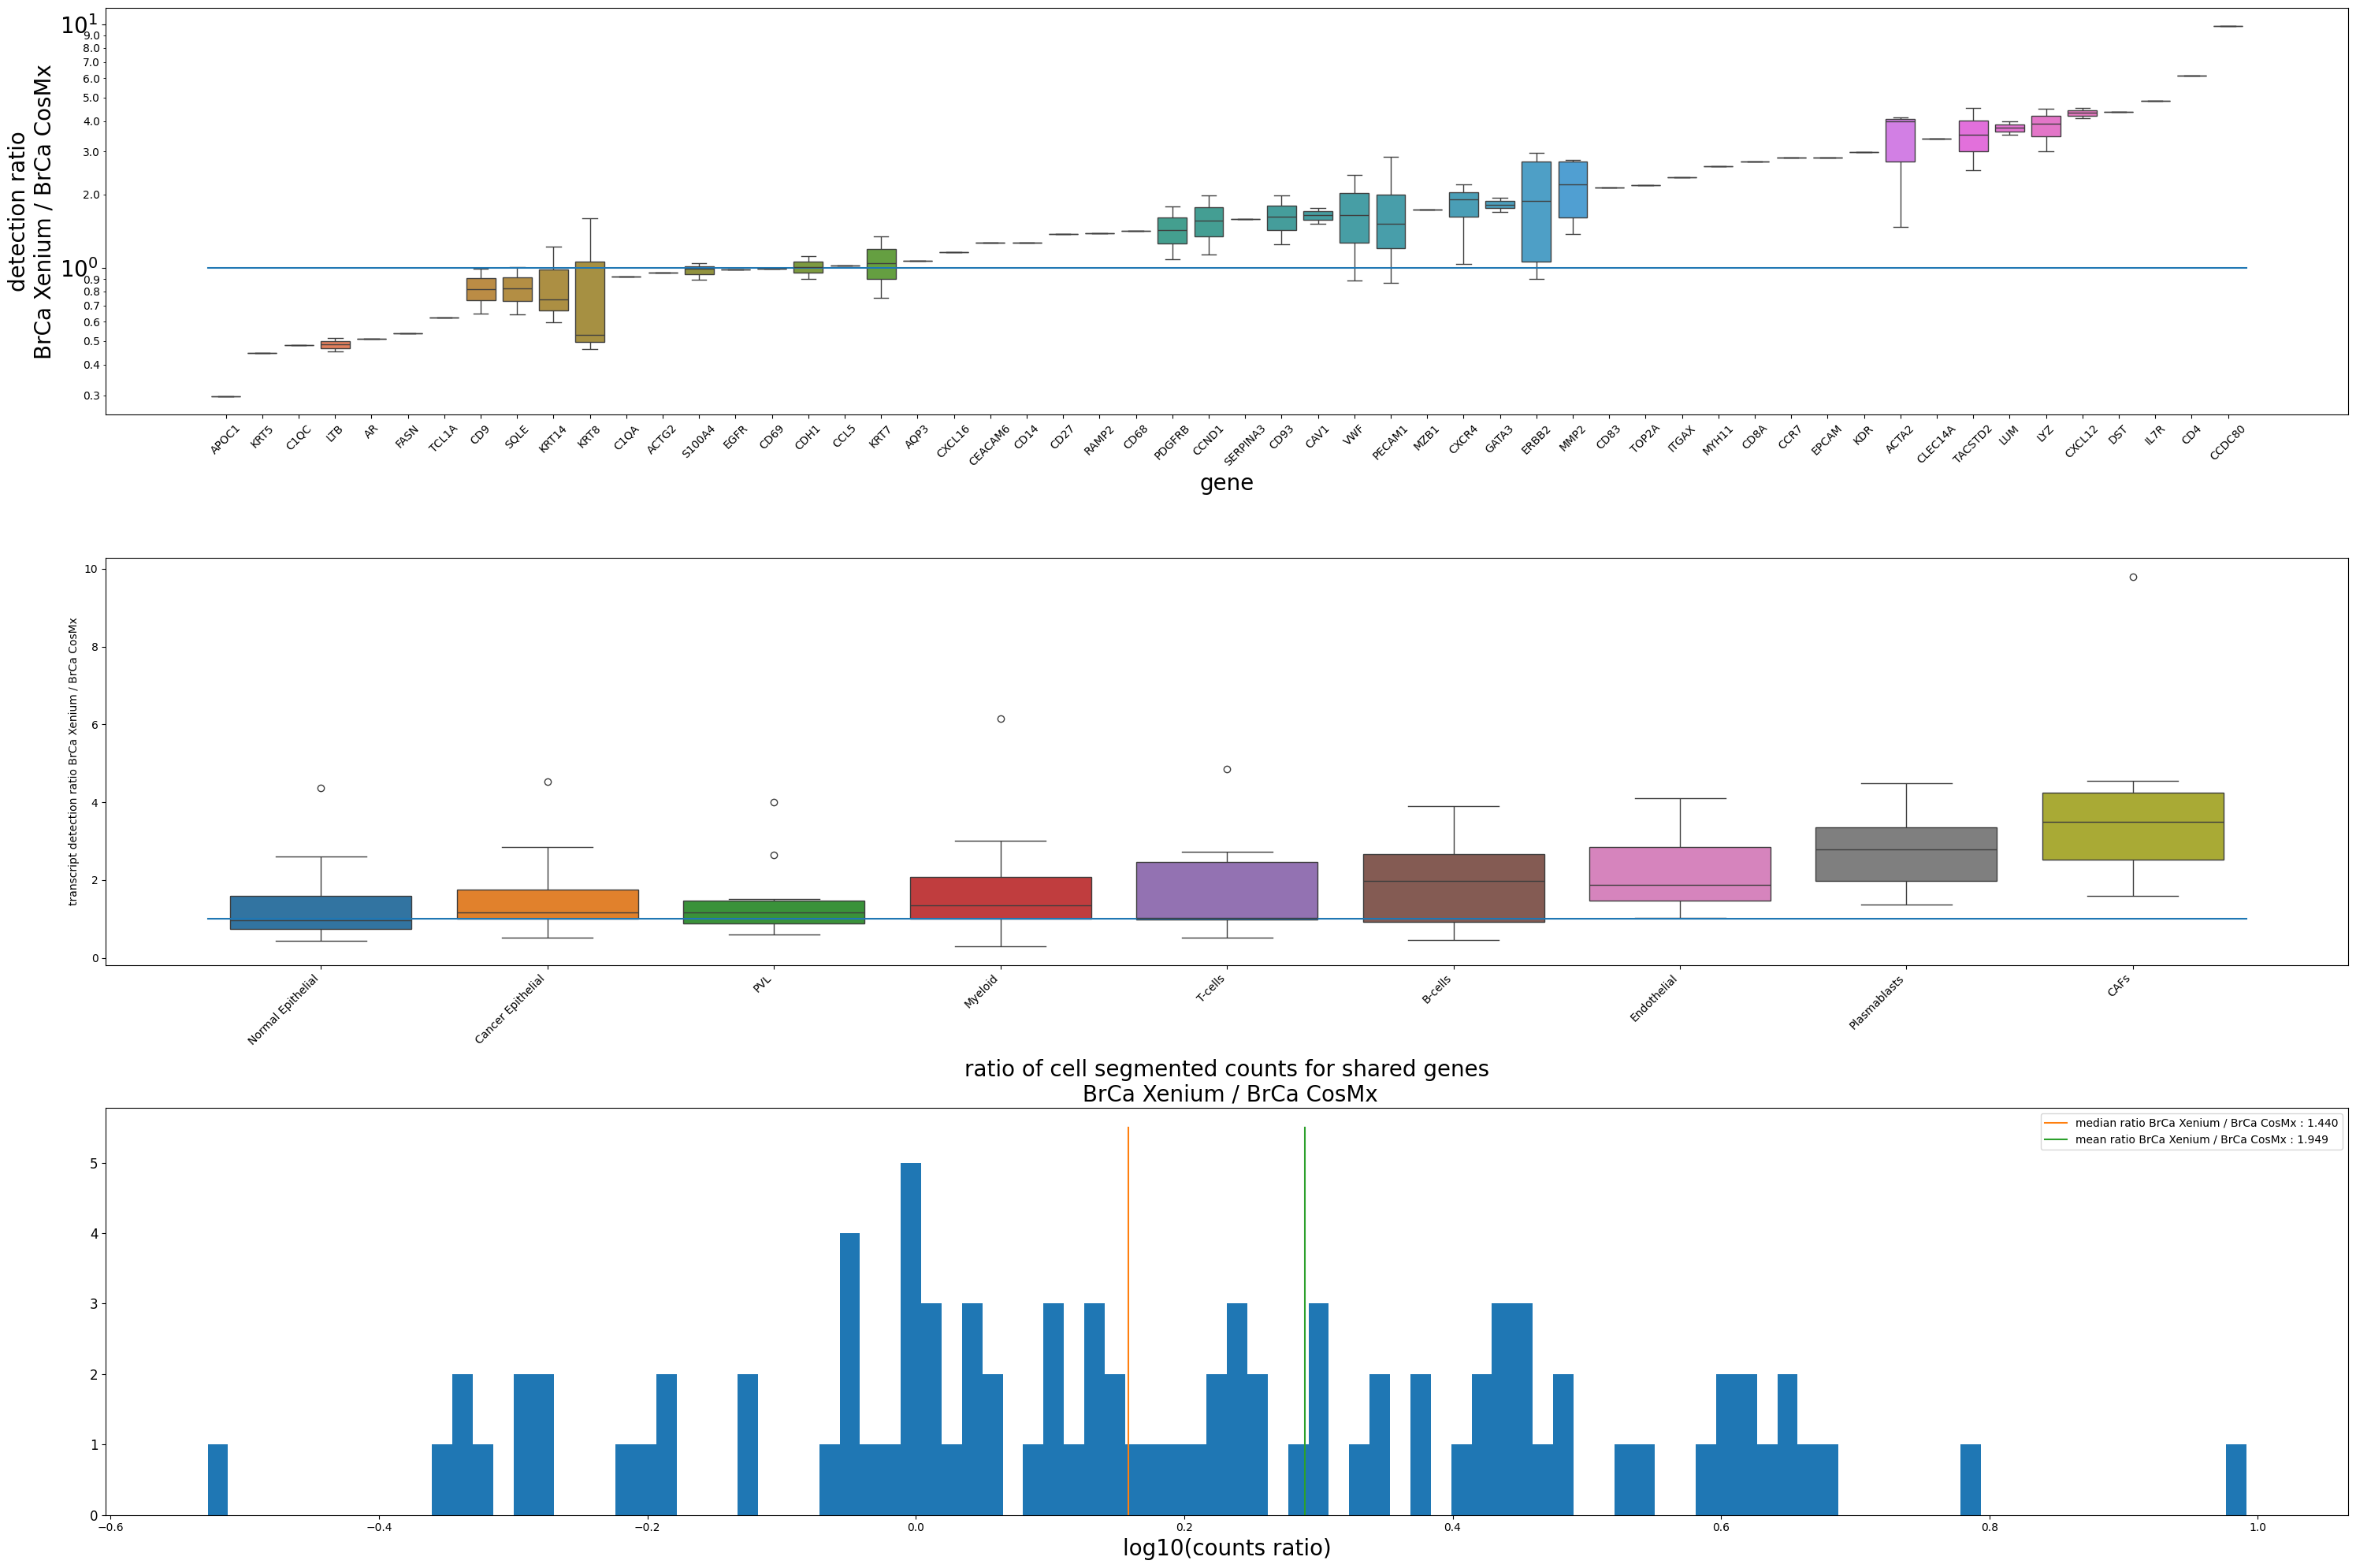

In [60]:
# Initialize and run spatial_compare
# Run SpatialCompare
%time
sc2 = SpatialCompare(br1, br2, data_names=["BrCa CosMx", "BrCa Xenium"], category='label')
sc2.run_and_plot()